# Python Recipes



In [109]:
%%writefile randomgraph_shortestpath.py
import numpy as np,networkx as nx,pylab as pl

def random_graph(num_min=7,num_max=15):
    num_nodes=np.random.randint(num_min,num_max+1)
    letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    nodes=list(letters)[:num_nodes]
    edges=[]
    for i in range(num_nodes):
        num_edges=np.random.randint(1,num_nodes-1)
        curr_edges=sorted(np.random.choice(
            nodes[:i]+nodes[i+1:],
            num_edges,replace=False))
        curr_edges=[(ce,np.random.randint(1,15))
                    for ce in curr_edges]
        edges+=[curr_edges]
    return dict(zip(nodes,edges))

def random_shortestpath(graph):
    n=len(graph.keys()); rg=nx.Graph()
    for key in graph.keys():
        for value in graph[key]:
           rg.add_edge(key,value[0],
                       length=value[1])
    [start,end]=np.random.choice(
        n,2,replace=False)
    start=list(graph.keys())[start]
    end=list(graph.keys())[end]
    shortest_path=nx.shortest_path(
        rg,start,end,
        weight='length')
    shortest_path_list=[]
    for i in range(len(shortest_path)-1):   
        shortest_path_list.append(
            (shortest_path[i],shortest_path[i+1]))
    print('start: '+start+'; end: '+end)
    print('the shortest path: ',shortest_path_list)
    return rg,shortest_path,shortest_path_list
        
def randomgraph_shortestpath(graph,fig_size=7):
    rg,shortest_path,shortest_path_list=\
    random_shortestpath(graph)
    lengths=nx.get_edge_attributes(rg,'length')   
    pos=nx.spring_layout(rg)
    pl.figure(figsize=(fig_size,fig_size))
    nx.draw(rg,pos,with_labels=True,
            node_shape='8',node_size=1000, 
            node_color='steelblue',
            edge_color='silver',
            width=5,alpha=.75)
    nx.draw_networkx_edge_labels(
        rg,pos,edge_labels=lengths)
    nx.draw_networkx_edges(
        rg,pos=pos,edgelist=shortest_path_list,
        edge_color='#ff9966',width=10,alpha=.5)
    pl.show();

Overwriting randomgraph_shortestpath.py


start: C; end: G
the shortest path:  [('C', 'H'), ('H', 'D'), ('D', 'G')]


<Figure size 432x288 with 0 Axes>

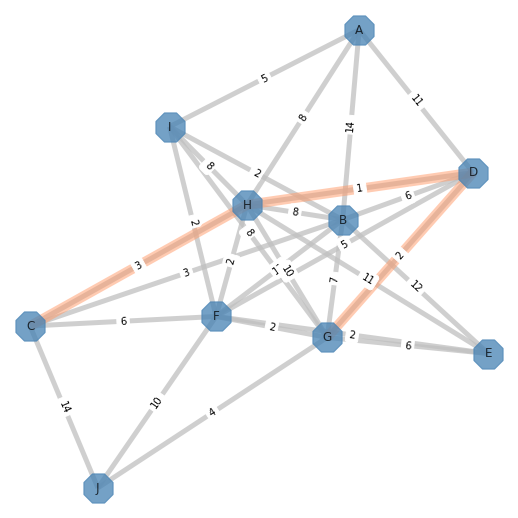

In [110]:
%run randomgraph_shortestpath.py
randomgraph_shortestpath(random_graph())

In [111]:
%%writefile sql_db.py
import sqlite3,os,pylab as pl
import numpy as np,sympy as sp,pandas as pd
from IPython.core.display import display, HTML
from IPython.core.magic import register_line_magic

thp=[('font-size','15px'),('text-align','center'),
     ('font-weight','bold'),('padding','5px 5px'),
     ('color','white'),('background-color','slategray')]
tdp=[('font-size','14px'),('padding','5px 5px'),
     ('text-align','center'),('color','darkblue'),
     ('background-color','silver')]
style_dict=[dict(selector='th',props=thp),
            dict(selector='td',props=tdp)]

def connect2db(dbf):
    sqlconn=None
    try:
        sqlconn=sqlite3.connect(dbf)
        return sqlconn
    except Error as err:
        print(err)
        if sqlconn is not None:
            sqlconn.close()

def name(**var):
    return [x for x in var]

def get_query(url,query,ftype='csv'):
    if ftype=='csv':
        df=pd.read_csv(url)
    if ftype=='json':
        df=pd.read_json(url)
    connection=connect2db('example.db')
    if connection is not None:
        cursor=connection.cursor()
    data_table=name(df=df)[0]
    df.to_sql(data_table,
              con=connection,
              if_exists='replace')
    sp.pprint(
        r'the result of the sql query from df:'+query)
    tr=[]; cursor.execute(query)
    result=cursor.fetchall()
    for r in result: 
        tr+=[r]
    result=pd.DataFrame.from_records(tr)
    display(result.style.set_table_styles(style_dict))
    if connection is not None:
        connection.close()
    if os.path.exists('example.db'):
        os.remove('example.db')
    else:
        sp.pprint('example.db does not exist')

Writing sql_db.py


In [112]:
%run sql_db.py

<Figure size 432x288 with 0 Axes>

In [113]:
url='https://raw.githubusercontent.com/plotly/'+\
    'datasets/master/2016-weather-data-seattle.csv'
query='''
SELECT SUBSTR(Date,-4,4) AS Years,
       AVG(Max_TemperatureC),
       AVG(Mean_TemperatureC),
       AVG(Min_TemperatureC)
FROM df
GROUP BY Years
LIMIT 5;
'''
get_query(url,query)

the result of the sql query from df:
 SELECT SUBSTR(Date,-4,4) AS Years, 
          AVG(Max_TemperatureC),    
          AVG(Mean_TemperatureC),   
           AVG(Min_TemperatureC)    
              FROM df               
           GROUP BY Years           
              LIMIT 5;              


,0,1,2,3
0,1948,13.571038,9.653005,5.956284
1,1949,14.676712,10.167123,5.780822
2,1950,13.539726,9.449315,5.471233
3,1951,14.443836,9.928767,5.627397
4,1952,14.489071,10.054645,5.789617


In [114]:
url='https://data.cityofnewyork.us/resource/'+\
    'h7rb-945c.json'
query='''
SELECT " 🏙 "||city||" 📑 "||dbn AS dbn_city,
       graduation_rate+attendance_rate 
       AS graduation_attendance_rate
FROM df
WHERE graduation_attendance_rate<1.3 AND 
graduation_rate<>"N/A" AND attendance_rate<>"N/A";
'''
get_query(url,query,ftype='json')

       the result of the sql query from df:       
   SELECT " 🏙 "||city||" 📑 "||dbn AS dbn_city,    
            graduation_rate+attendance_rate       
              AS graduation_attendance_rate       
                     FROM df                      
    WHERE graduation_attendance_rate<1.3 AND      
graduation_rate<>"N/A" AND attendance_rate<>"N/A";


,0,1
0,🏙 Manhattan 📑 05M367,1.160000
1,🏙 Jamaica 📑 27Q400,1.210000
2,🏙 Bronx 📑 08X530,1.210000
3,🏙 Bronx 📑 12X479,1.180000
4,🏙 Manhattan 📑 04M409,1.290000
5,🏙 Bronx 📑 10X524,1.260000


# Useful Tips

In [115]:
url1='https://raw.githubusercontent.com/plotly/'+\
    'datasets/master/2016-weather-data-seattle.csv'
url2='2016-weather-data-seattle.csv'
url1.split('/')[-1][:-4]==url2.split('/')[-1][:-4]

True

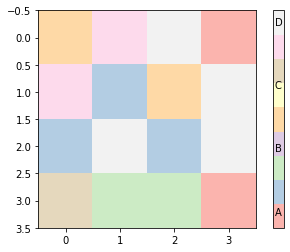

In [116]:
import numpy as np, pylab as pl
data=np.random.rand(4,4)
cmap=pl.imshow(data,cmap="Pastel1")
cbar=pl.colorbar(cmap)
cbar.set_ticks(list())
for index,label in enumerate(["A","B","C","D"]):
    x=.25; y=(2*index+1)/8
    cbar.ax.text(x,y,label)

In [117]:
data=[]; table=[]
def name(**var):
    return [x for x in var]
name(data=data),name(table=table)[0]

(['data'], 'table')